<a href="https://colab.research.google.com/github/BENMEZIAN/Pandas-tutorial/blob/main/date_range.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('aapl_no_dates.csv')
df.head(3)

Open    High     Low   Close    Volume
0  153.17  153.33  152.22  153.18  16404088
1  153.58  155.45  152.89  155.45  27770715
2  154.34  154.45  153.46  153.93  25331662

In [5]:
rng = pd.date_range(start='6/1/2017', end='6/30/2017', freq='B')
rng

DatetimeIndex(['2017-06-01', '2017-06-02', '2017-06-05', '2017-06-06',
               '2017-06-07', '2017-06-08', '2017-06-09', '2017-06-12',
               '2017-06-13', '2017-06-14', '2017-06-15', '2017-06-16',
               '2017-06-19', '2017-06-20', '2017-06-21', '2017-06-22',
               '2017-06-23', '2017-06-26', '2017-06-27', '2017-06-28',
               '2017-06-29', '2017-06-30'],
              dtype='datetime64[ns]', freq='B')

In [6]:
df.set_index(rng, inplace=True)
df.head(3)

Open    High     Low   Close    Volume
2017-06-01  153.17  153.33  152.22  153.18  16404088
2017-06-02  153.58  155.45  152.89  155.45  27770715
2017-06-05  154.34  154.45  153.46  153.93  25331662

<Axes: >

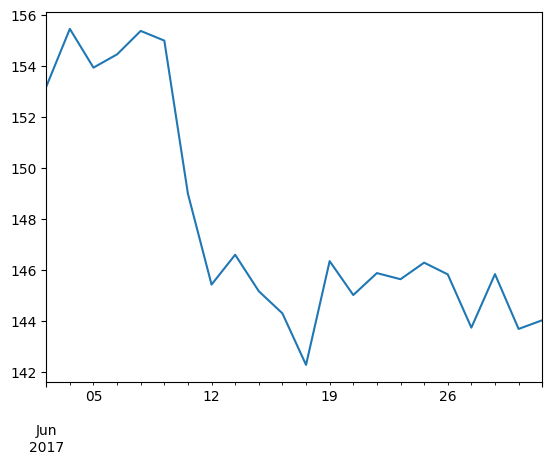

In [7]:
%matplotlib inline
df.Close.plot()

In [9]:
df.loc["2017-06-01":"2017-06-10","Close"].mean()

153.7642857142857

# asfreq

In [ ]:
# prompt: What the asfreq's purpose ?

#The `asfreq()` method in pandas is used to convert time series data to a specified frequency.
#It will introduce missing values (NaN) if the original data does not have observations for all the new
#frequencies.  You would use `asfreq()` when you need to ensure your time series data is consistently
#sampled at a particular interval (e.g., daily, hourly, etc.), even if the original data was not recorded at
#that interval.  The `method` parameter lets you specify how to fill the missing values.
#Common `method` values are `'ffill'` (forward fill), `'bfill'` (backward fill) and others.

In [40]:
# prompt: It's like handling missing values ?

# Forward fill
df_resampled = df.asfreq('D', method='ffill')
print(df_resampled)

comment = """
# Backward fill
df.asfreq('D', method='bfill').Close.plot()
# Linear interpolation
df.asfreq('D').Close.interpolate(method='linear').plot()
"""

              Open    High     Low   Close    Volume
2017-06-01  153.17  153.33  152.22  153.18  16404088
2017-06-02  153.58  155.45  152.89  155.45  27770715
2017-06-03  153.58  155.45  152.89  155.45  27770715
2017-06-04  153.58  155.45  152.89  155.45  27770715
2017-06-05  154.34  154.45  153.46  153.93  25331662
2017-06-06  153.90  155.81  153.78  154.45  26624926
2017-06-07  155.02  155.98  154.48  155.37  21069647
2017-06-08  155.25  155.54  154.40  154.99  21250798
2017-06-09  155.19  155.19  146.02  148.98  64882657
2017-06-10  155.19  155.19  146.02  148.98  64882657
2017-06-11  155.19  155.19  146.02  148.98  64882657
2017-06-12  145.74  146.09  142.51  145.42  72307330
2017-06-13  147.16  147.45  145.15  146.59  34165445
2017-06-14  147.50  147.50  143.84  145.16  31531232
2017-06-15  143.32  144.48  142.21  144.29  32165373
2017-06-16  143.78  144.50  142.20  142.27  50361093
2017-06-17  143.78  144.50  142.20  142.27  50361093
2017-06-18  143.78  144.50  142.20  142.27  50

In [43]:
df.asfreq('W',method='ffill')

Open    High     Low   Close    Volume
2017-06-04  153.58  155.45  152.89  155.45  27770715
2017-06-11  155.19  155.19  146.02  148.98  64882657
2017-06-18  143.78  144.50  142.20  142.27  50361093
2017-06-25  145.13  147.16  145.11  146.28  35439389